**OUTLIER DETECTION AND HANDLING - CATEGORICAL DATA**

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import folium
from IPython.display import IFrame
import webbrowser

**Generating a pandas dataframe from the source .csv file**

In [79]:
# Set options to show all columns
pd.set_option('display.max_columns', None)

# Load .pkl file and generate pandas dataframe
input_pkl = r'..\data\clean\after_step_3a_outliers_num.pkl' # Fill your path to file
df_1 = pd.read_pickle(input_pkl)

df_1_shape = df_1.shape # Pass the shape of the dataframe to a variable for summary at end of the outlier detection and removal part
df_1.info()

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land,Province,Assigned_City,Has_Assigned_City,Assigned_City_5,Has_Assigned_City_5,Assigned_City_10,Has_Assigned_City_10,Assigned_City_15,Has_Assigned_City_15
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,3.625722,False,False,True,23,370,Installed,4,To renovate,False,F,767,2552.000000,415.906128,East Flanders,NaN,False,NaN,False,NaN,False,NaN,False
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,3.925495,False,False,True,23,895,Installed,2,Good,False,D,1050,1796.401198,285.713333,East Flanders,NaN,False,NaN,False,NaN,False,Aalst,True
2,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,4.491795,False,False,True,10,20,Semi equipped,2,To renovate,False,E,120,1785.714286,2291.666667,Antwerp,NaN,False,NaN,False,NaN,False,Brussels,True
3,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,4.084293,False,False,True,23,300,Installed,3,To renovate,False,F,309,1715.116279,954.692557,Brabant_Wallon,NaN,False,NaN,False,NaN,False,Aalst,True
5,20251715,Dilbeek,1700,715000,House,3,280,Herdebeekstraat 94-94A,0,50.840610,4.228425,False,True,True,36,374,Installed,3,As new,False,C,374,2553.571429,1911.764706,Brabant_Wallon,NaN,False,NaN,False,Brussels,True,Brussels,True


**Categorical data - KITCHEN_TYPE**


*Checking for missing values and displaying the distribution of the amount of properties over the category*

In [80]:
#Checking the missing values
print("Mean: ", df_1['Kitchen_type'].isnull().mean()*100)
print("Count of missing values: ", df_1['Kitchen_type'].isnull().sum())

frequency = df_1['Kitchen_type'].value_counts()
print(frequency)

Mean:  0.0
Count of missing values:  0
Kitchen_type
Installed             3001
Hyper equipped         510
Semi equipped          490
Not installed          145
Usa installed           21
Usa hyper equipped      11
Usa semi equipped        1
Usa uninstalled          1
Name: count, dtype: int64


In [81]:
#Dealing with the high number of missing values
#df['Kitchen_type'] = df['Kitchen_type'].apply(lambda x: 'Missing' if pd.isna(x) else x)

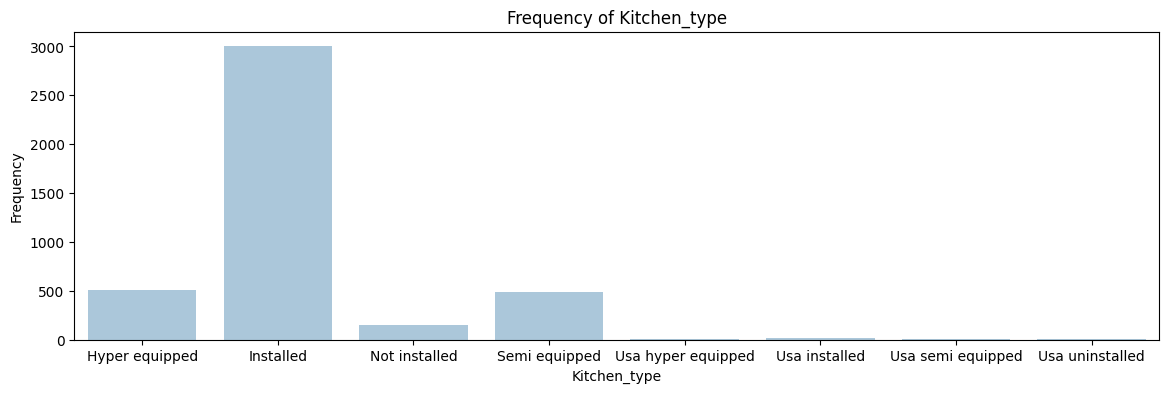

In [82]:
#Detecting Outliers on plot

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values, color='#A3C9E2')
plt.title('Frequency of Kitchen_type')
plt.xlabel('Kitchen_type')
plt.ylabel('Frequency')
plt.show()

*Creating a frequency dataframe and Determining rare values*

In [83]:
#Creating a seperate frequency dataframe

frequency_df = frequency.reset_index()
frequency_df.columns = ['Kitchen_type', 'count']

print(frequency_df)

         Kitchen_type  count
0           Installed   3001
1      Hyper equipped    510
2       Semi equipped    490
3       Not installed    145
4       Usa installed     21
5  Usa hyper equipped     11
6   Usa semi equipped      1
7     Usa uninstalled      1


In [84]:
#Determing the rare values (threshold 5%)
threshold = 0.05 * len(df_1)  
rare_categories = frequency[frequency < threshold]

print("Rare Values:", rare_categories)

Rare Values: Kitchen_type
Not installed         145
Usa installed          21
Usa hyper equipped     11
Usa semi equipped       1
Usa uninstalled         1
Name: count, dtype: int64


In [85]:
#Assign the rare value to another value
category_map = {'Usa hyper equipped': 'Hyper equipped', 'Usa semi equipped': 'Semi equipped', 'Usa uninstalled':'Not installed', 'Usa installed':'Installed'}
df_1['Kitchen_type'] = df_1['Kitchen_type'].map(category_map).fillna(df_1['Kitchen_type'])

frequency = df_1['Kitchen_type'].value_counts()
frequency

Kitchen_type
Installed         3022
Hyper equipped     521
Semi equipped      491
Not installed      146
Name: count, dtype: int64

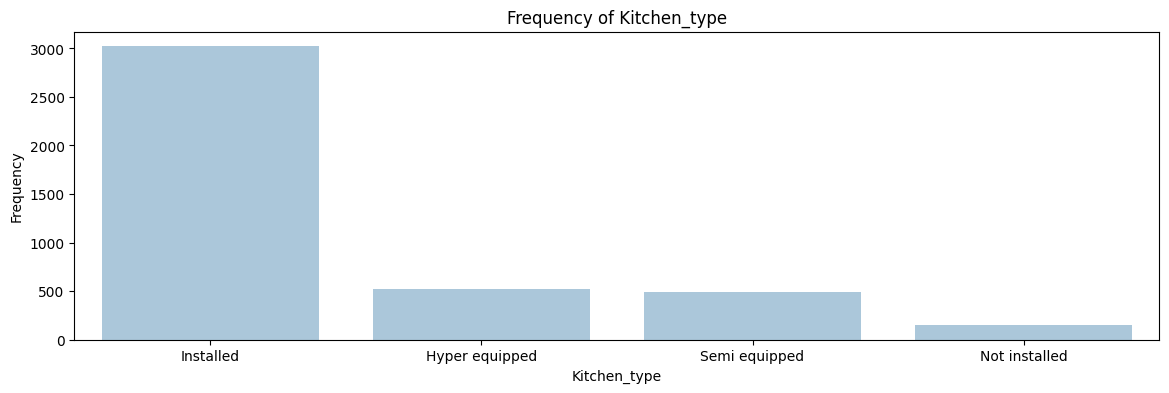

In [86]:
#Showing the final distrubution

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values, color='#A3C9E2')
plt.title('Frequency of Kitchen_type')
plt.xlabel('Kitchen_type')
plt.ylabel('Frequency')
plt.show()

*Encoding - label encoding*

In [87]:
#This categorical data has a natural order we encode it in a way that reflects this ordering. We will use Label Encoding.
order = ['Not installed', 'Installed', 'Semi equipped', 'Hyper equipped']

category_mapping = {category: rank for rank, category in enumerate(order)}

df_1['Kitchen_type_encoded'] = df_1['Kitchen_type'].map(category_mapping)

frequency = df_1['Kitchen_type_encoded'].value_counts()
frequency

Kitchen_type_encoded
1    3022
3     521
2     491
0     146
Name: count, dtype: int64

**State_of_building**

*Checking for missing values and displaying the distribution of the amount of properties over the category*

Mean:  0.0
Count of missing values:  0
State_of_building
Good              2044
To renovate        728
As new             723
To be done up      444
Just renovated     214
To restore          27
Name: count, dtype: int64


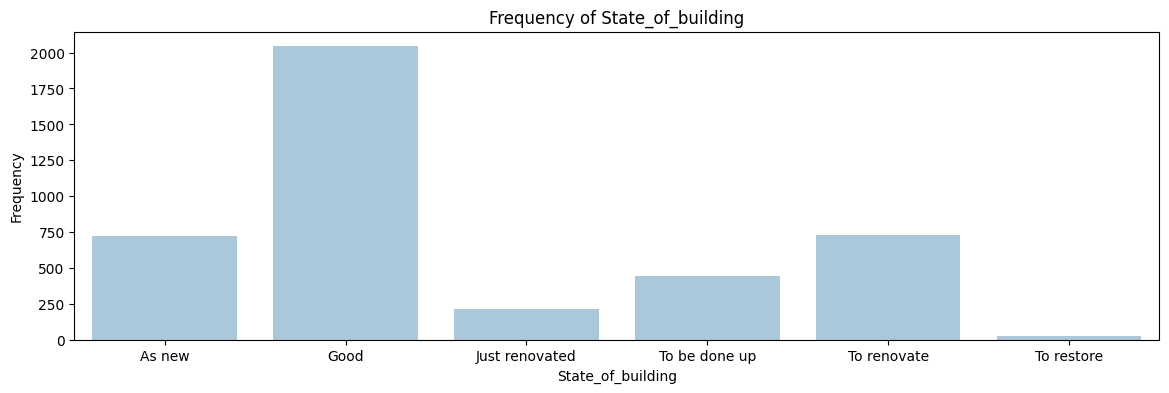

In [88]:
#Checking the missing values
print("Mean: ", df_1['State_of_building'].isnull().mean()*100)
print("Count of missing values: ", df_1['State_of_building'].isnull().sum())

frequency = df_1['State_of_building'].value_counts()
print(frequency)

#Detecting Outliers on plot

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values, color='#A3C9E2')
plt.title('Frequency of State_of_building')
plt.xlabel('State_of_building')
plt.ylabel('Frequency')
plt.show()

*Creating a separate frequency dataframe and Determining rare values*

In [89]:
#Creating a seperate frequency dataframe

frequency_df = frequency.reset_index()
frequency_df.columns = ['State_of_building', 'count']

print(frequency_df)

  State_of_building  count
0              Good   2044
1       To renovate    728
2            As new    723
3     To be done up    444
4    Just renovated    214
5        To restore     27


In [90]:
#Determing the rare values (threshold 5%)
threshold = 0.05 * len(df_1)  
rare_categories = frequency[frequency < threshold]

print("Rare Values:", rare_categories)

Rare Values: State_of_building
To restore    27
Name: count, dtype: int64


In [91]:
#Assign the rare value to another value
category_map = {'To restore': 'To renovate'}
df_1['State_of_building'] = df_1['State_of_building'].map(category_map).fillna(df_1['State_of_building'])

frequency = df_1['State_of_building'].value_counts()
frequency

State_of_building
Good              2044
To renovate        755
As new             723
To be done up      444
Just renovated     214
Name: count, dtype: int64

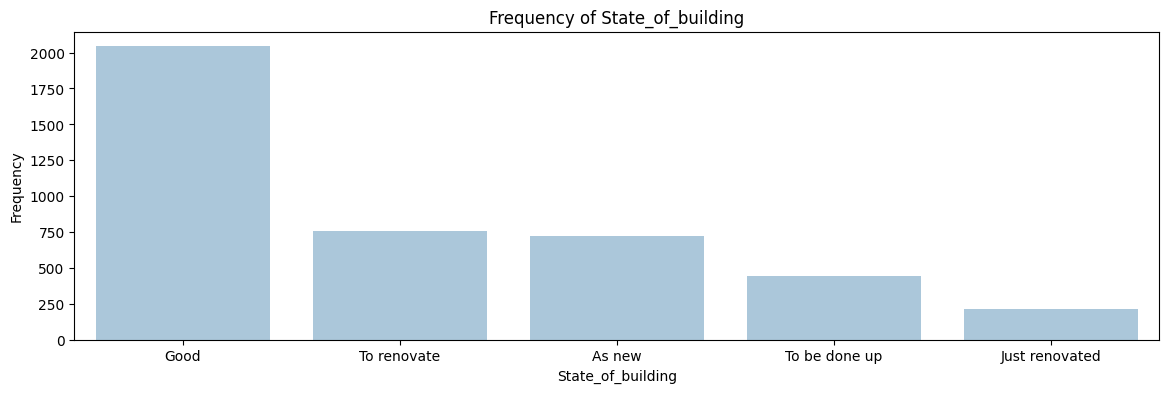

In [92]:
# Showing the final distrubution

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values, color='#A3C9E2')
plt.title('Frequency of State_of_building')
plt.xlabel('State_of_building')
plt.ylabel('Frequency')
plt.show()

*Encoding - label encoding*

In [93]:
#This categorical data has a natural order we encode it in a way that reflects this ordering. We will use Label Encoding.
order = ['To renovate', 'To be done up', 'Good', 'Just renovated', 'As new']

category_mapping = {category: rank for rank, category in enumerate(order)}

df_1['State_of_building_encoded'] = df_1['State_of_building'].map(category_mapping)

frequency = df_1['State_of_building_encoded'].value_counts()
frequency

State_of_building_encoded
2    2044
0     755
4     723
1     444
3     214
Name: count, dtype: int64

**Categorical data: EPC**

*Checking for missing values and displaying the distribution of the amount of properties over the category*

Mean:  0.0
Count of missing values:  0
epc
C      920
F      830
D      743
B      619
E      484
A      387
G      140
A+      46
A++     11
Name: count, dtype: int64


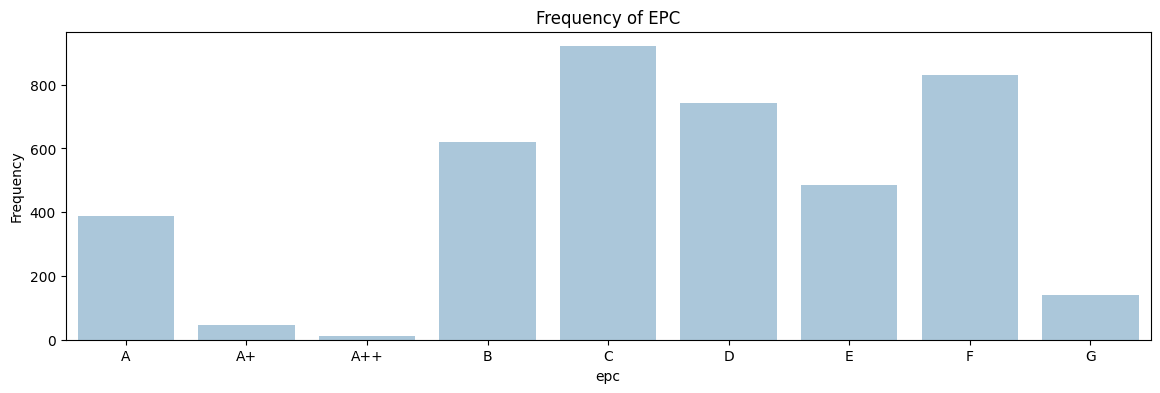

In [94]:
#Checking the missing values
print("Mean: ", df_1['epc'].isnull().mean()*100)
print("Count of missing values: ", df_1['epc'].isnull().sum())

frequency = df_1['epc'].value_counts()
print(frequency)

#Detecting Outliers on plot

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values, color='#A3C9E2')
plt.title('Frequency of EPC')
plt.xlabel('epc')
plt.ylabel('Frequency')
plt.show()

*Creating a separate frequency dataframe and Determining rare values*

In [95]:
#Creating a seperate frequency dataframe

frequency_df = frequency.reset_index()
frequency_df.columns = ['epc', 'count']

print(frequency_df)

   epc  count
0    C    920
1    F    830
2    D    743
3    B    619
4    E    484
5    A    387
6    G    140
7   A+     46
8  A++     11


In [96]:
#Determining the rare values (threshold 5%)
threshold = 0.05 * len(df_1)  
rare_categories = frequency[frequency < threshold]

print("Rare Values:", rare_categories)

Rare Values: epc
G      140
A+      46
A++     11
Name: count, dtype: int64


*Dealing with missing values (Imputation)*

In [97]:
#Dealing with missing values (Imputation)

df_1['epc'] = df_1['epc'].fillna(df_1['epc'].mode()[0])
frequency = df_1['epc'].value_counts()
frequency

#Missing is also a possibility here???

#df['epc'] = df['epc'].fillna('Missing')

epc
C      920
F      830
D      743
B      619
E      484
A      387
G      140
A+      46
A++     11
Name: count, dtype: int64

In [98]:
#Assign the rare value to another value (EPC G only exist in Brussels and Wallonia)
category_map = {'A+': 'A', 'A++': 'A', 'G':'F'}
df_1['epc'] = df_1['epc'].map(category_map).fillna(df_1['epc'])

frequency = df_1['epc'].value_counts()
frequency

epc
F    970
C    920
D    743
B    619
E    484
A    444
Name: count, dtype: int64

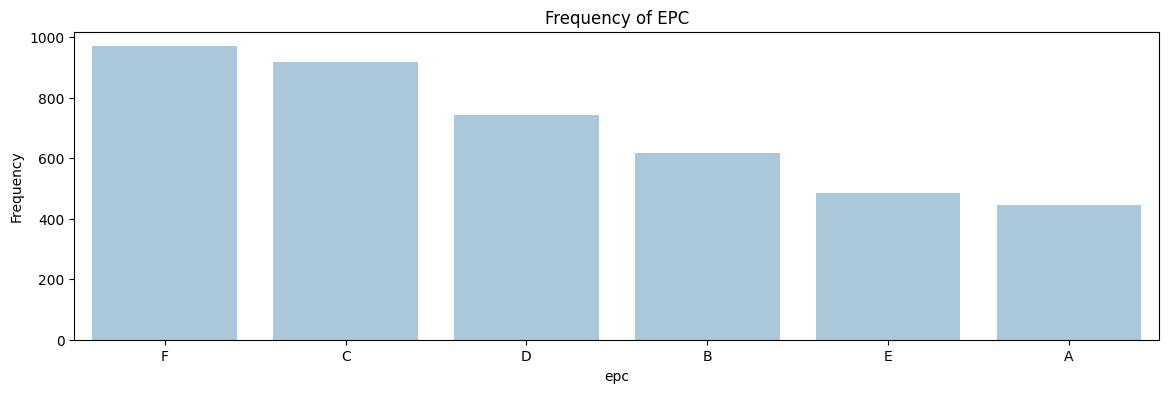

In [99]:
# Showing the final distrubution

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values, color='#A3C9E2')
plt.title('Frequency of EPC')
plt.xlabel('epc')
plt.ylabel('Frequency')
plt.show()

*Encoding - label encoding*

In [100]:
#This categorical data has a natural order we encode it in a way that reflects this ordering. We will use Label Encoding.
order = ['F', 'E', 'D', 'C', 'B', 'A']

category_mapping = {category: rank for rank, category in enumerate(order)}

df_1['EPC_encoded'] = df_1['epc'].map(category_mapping)

frequency = df_1['EPC_encoded'].value_counts()
frequency

EPC_encoded
0    970
3    920
2    743
4    619
1    484
5    444
Name: count, dtype: int64

**Saving data to a new .csv file and a .pkl file**

In [101]:
# Save data to new csv file

output_csv = r'..\data\clean\after_step_3b_outliers_cat.csv'  # Fill your path to file
df_1.to_csv(output_csv, index=False)


# Save data to new pkl file

import pickle
output_pkl = r'..\data\clean\after_step_3b_outliers_cat.pkl' # Fill your path to file
with open(output_pkl, 'wb') as f:
    pickle.dump(df_1, f)
